# Аппроксимация логических функций

## Двоичная логика

Два входа и 6 выходов, моделирующих основные бинарные  логические функции - конъюнкция, дизъюнкция, исключающее или, импликация, штрих Шеффера и Стрелку Пирса.

In [21]:
import tensorflow as tf

from tensorflow.keras import layers
from tensorflow import keras

In [2]:
def f_and(x1,x2):
  return int(x1 and x2)
def f_or(x1,x2):
  return int(x1 or x2)
def f_xor(x1,x2):
  return int(x1 != x2)
def f_imp(x1,x2):
  return int(x1 <= x2)
def f_sh(x1,x2):
  return int(x1!=1 or x2!=1)
def f_nor(x1,x2):
  return int(x1!=1 and x2!=1)

In [3]:
from itertools import product

In [4]:
inpt = [*product([0,1], repeat=2)]

In [5]:
inpt

[(0, 0), (0, 1), (1, 0), (1, 1)]

In [6]:
import numpy as np
def generate_ds(k, repeat=1):
  X = np.array([*product([0,1], repeat=k)]*repeat)
  y = np.array([[f_and(*x), f_or(*x), f_xor(*x),
               f_imp(*x), f_sh(*x), f_nor(*x)] for x in X]) 
  return X, y


In [7]:
X, y = generate_ds(2, 200)

In [8]:
X.shape

(800, 2)

In [9]:
y.shape

(800, 6)

In [10]:
y

array([[0, 0, 0, 1, 1, 1],
       [0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1, 0],
       ...,
       [0, 1, 1, 1, 1, 0],
       [0, 1, 1, 0, 1, 0],
       [1, 1, 0, 1, 0, 0]])

+ 1 hidden layer (6, 'relu')
+ output: sigmoid

In [11]:
inputs = keras.Input(shape=(2,), name="input")
layer1 = layers.Dense(6, activation="relu", name="dense1")(inputs)
outputs = layers.Dense(6, activation="sigmoid", name="out")(layer1)

In [12]:
model_6_6 = keras.Model(inputs=inputs, outputs=outputs)

In [13]:
model_6_6.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 6)                 18        
_________________________________________________________________
out (Dense)                  (None, 6)                 42        
Total params: 60
Trainable params: 60
Non-trainable params: 0
_________________________________________________________________


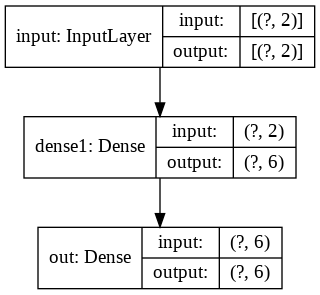

In [24]:
from tensorflow.keras.utils import plot_model
plot_model(model_6_6, show_shapes=True, show_layer_names=True)

In [25]:
model_6_6.compile(loss=tf.keras.losses.mean_squared_error, optimizer="SGD")


In [26]:
history = model_6_6.fit(X, y, batch_size=6, epochs=50)

Epoch 1/50
134/134 [==============================] - 0s 878us/step - loss: 0.2367
Epoch 2/50
134/134 [==============================] - 0s 905us/step - loss: 0.2312
Epoch 3/50
134/134 [==============================] - 0s 873us/step - loss: 0.2262
Epoch 4/50
134/134 [==============================] - 0s 818us/step - loss: 0.2217
Epoch 5/50
134/134 [==============================] - 0s 876us/step - loss: 0.2176
Epoch 6/50
134/134 [==============================] - 0s 740us/step - loss: 0.2139
Epoch 7/50
134/134 [==============================] - 0s 855us/step - loss: 0.2105
Epoch 8/50
134/134 [==============================] - 0s 824us/step - loss: 0.2073
Epoch 9/50
134/134 [==============================] - 0s 878us/step - loss: 0.2044
Epoch 10/50
134/134 [==============================] - 0s 814us/step - loss: 0.2014
Epoch 11/50
134/134 [==============================] - 0s 736us/step - loss: 0.1986
Epoch 12/50
134/134 [==============================] - 0s 822us/step - loss: 0.1960
E

In [27]:
predictions = model_6_6.predict(X[:12])
print( y[:12])


[[0 0 0 1 1 1]
 [0 1 1 1 1 0]
 [0 1 1 0 1 0]
 [1 1 0 1 0 0]
 [0 0 0 1 1 1]
 [0 1 1 1 1 0]
 [0 1 1 0 1 0]
 [1 1 0 1 0 0]
 [0 0 0 1 1 1]
 [0 1 1 1 1 0]
 [0 1 1 0 1 0]
 [1 1 0 1 0 0]]


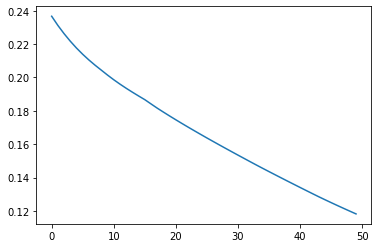

In [28]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [14]:
def run_test(model, eps, X, y, k=100):
  new_x = np.tile(X, (k,1))
  new_y = np.tile(y, (k,1))
  noisy_x = new_x + (0.5 - np.random.ranf(new_x.shape))*eps
  predictions = model.predict(noisy_x)
  predictions = np.rint(predictions.flatten())
  errors = np.sum(np.square(predictions - new_y.flatten()))
  return errors, errors/new_y.size


+ layer 2 (8, 'elu')
+ output: sigmoid -> elu

In [1]:
inputs = keras.Input(shape=(2,), name="input")
layer1 = layers.Dense(6, activation="elu", name="dense1")(inputs)
layer2 = layers.Dense(8, activation="elu", name="dense2")(layer1)
outputs = layers.Dense(6, activation="elu", name="out")(layer2)
model_6_8_6 = keras.Model(inputs=inputs, outputs=outputs)
model_6_8_6.compile(loss=tf.keras.losses.mean_squared_error, optimizer="SGD")
from tensorflow.keras.utils import plot_model
plot_model(model_6_8_6, show_shapes=True, show_layer_names=True)
model_6_8_6.summary()

NameError: name 'keras' is not defined

In [36]:
history = model_6_8_6.fit(X, y, batch_size=6, epochs=50)

Epoch 1/50
134/134 [==============================] - 0s 1ms/step - loss: 0.4304
Epoch 2/50
134/134 [==============================] - 0s 1ms/step - loss: 0.2079
Epoch 3/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1679
Epoch 4/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1511
Epoch 5/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1393
Epoch 6/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1296
Epoch 7/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1215
Epoch 8/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1145
Epoch 9/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1087
Epoch 10/50
134/134 [==============================] - 0s 1ms/step - loss: 0.1040
Epoch 11/50
134/134 [==============================] - 0s 968us/step - loss: 0.1002
Epoch 12/50
134/134 [==============================] - 0s 1ms/step - loss: 0.0973
Epoch 13/50
134/134 [==

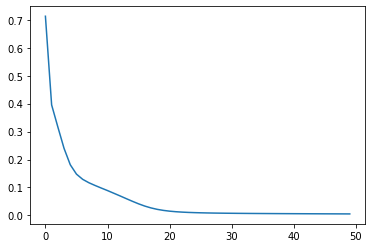

In [32]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [37]:
run_test(model_6_8_6, 0.5, X, y, k=100)

(3104.0, 0.006466666666666667)

## Трехзначная логика

Два входа и моделирующих основные функции классической трёхзначной логики - конъюнкция, дизъюнкция, испликации, циклический сдвиг первого входа и отрицание второго входа.

In [23]:
def f_and(x1,x2):
  return min(x1, x2)
def f_or(x1,x2):
  return max(x1, x2)
def f_imp(x1,x2):
  return max(2-x1, x2)
def f_not(x1,x2):
  return 2-x1
def f_shift(x1,x2):
  return (x2+1)%3

In [24]:
inpt = [*product([0,1,2], repeat=2)]

In [25]:
def generate_ds(k, repeat=1):
  X = np.array([*product([0,1,2], repeat=2)]*repeat)
  y = np.array([[f_and(*x), f_or(*x), f_imp(*x),
                f_not(*x) ,f_shift(*x)] for x in X])
  return X, y

In [26]:
X, y = generate_ds(2, 200)

In [27]:
inputs = keras.Input(shape=(2,), name="input")
layer1 = layers.Dense(6, activation="relu", name="dense1")(inputs)
layer2 = layers.Dense(8, activation="relu", name="dense2")(layer1)
outputs = layers.Dense(5, activation="relu", name="out")(layer2)
model_6_8_6 = keras.Model(inputs=inputs, outputs=outputs)
model_6_8_6.compile(loss=tf.keras.losses.mean_squared_error, optimizer="SGD")
from tensorflow.keras.utils import plot_model
plot_model(model_6_8_6, show_shapes=True, show_layer_names=True)
model_6_8_6.summary()

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 6)                 18        
_________________________________________________________________
dense2 (Dense)               (None, 8)                 56        
_________________________________________________________________
out (Dense)                  (None, 5)                 45        
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [28]:
history = model_6_8_6.fit(X, y, batch_size=6, epochs=50)

Epoch 1/50
300/300 [==============================] - 0s 789us/step - loss: 1.6988
Epoch 2/50
300/300 [==============================] - 0s 777us/step - loss: 1.6686
Epoch 3/50
300/300 [==============================] - 0s 787us/step - loss: 1.6554
Epoch 4/50
300/300 [==============================] - 0s 800us/step - loss: 1.6476
Epoch 5/50
300/300 [==============================] - 0s 846us/step - loss: 1.6412
Epoch 6/50
300/300 [==============================] - 0s 770us/step - loss: 1.2817
Epoch 7/50
300/300 [==============================] - 0s 877us/step - loss: 1.0402
Epoch 8/50
300/300 [==============================] - 0s 777us/step - loss: 1.0118
Epoch 9/50
300/300 [==============================] - 0s 820us/step - loss: 0.9900
Epoch 10/50
300/300 [==============================] - 0s 823us/step - loss: 0.9748
Epoch 11/50
300/300 [==============================] - 0s 913us/step - loss: 0.9612
Epoch 12/50
300/300 [==============================] - 0s 773us/step - loss: 0.9477
E

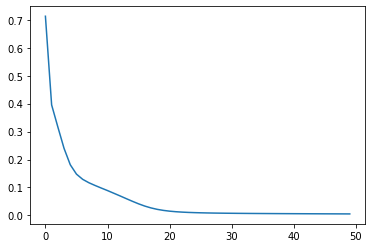

In [33]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])

In [29]:
run_test(model_6_8_6, 0.5, X, y, k=100)

(773659.0, 0.8596211111111111)

In [30]:
inputs = keras.Input(shape=(2,), name="input")
layer1 = layers.Dense(6, activation="tanh", name="dense1")(inputs)
layer2 = layers.Dense(8, activation="tanh", name="dense2")(layer1)
outputs = layers.Dense(5, activation="relu", name="out")(layer2)
model_6_8_6_tanh = keras.Model(inputs=inputs, outputs=outputs)
model_6_8_6_tanh.compile(loss=tf.keras.losses.mean_squared_error, optimizer="SGD")
from tensorflow.keras.utils import plot_model
plot_model(model_6_8_6_tanh, show_shapes=True, show_layer_names=True)
model_6_8_6_tanh.summary()

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 2)]               0         
_________________________________________________________________
dense1 (Dense)               (None, 6)                 18        
_________________________________________________________________
dense2 (Dense)               (None, 8)                 56        
_________________________________________________________________
out (Dense)                  (None, 5)                 45        
Total params: 119
Trainable params: 119
Non-trainable params: 0
_________________________________________________________________


In [31]:
history = model_6_8_6_tanh.fit(X, y, batch_size=6, epochs=50)

Epoch 1/50
300/300 [==============================] - 0s 787us/step - loss: 0.7128
Epoch 2/50
300/300 [==============================] - 0s 830us/step - loss: 0.3955
Epoch 3/50
300/300 [==============================] - 0s 839us/step - loss: 0.3166
Epoch 4/50
300/300 [==============================] - 0s 829us/step - loss: 0.2399
Epoch 5/50
300/300 [==============================] - 0s 807us/step - loss: 0.1814
Epoch 6/50
300/300 [==============================] - 0s 806us/step - loss: 0.1477
Epoch 7/50
300/300 [==============================] - 0s 793us/step - loss: 0.1291
Epoch 8/50
300/300 [==============================] - 0s 830us/step - loss: 0.1169
Epoch 9/50
300/300 [==============================] - 0s 820us/step - loss: 0.1071
Epoch 10/50
300/300 [==============================] - 0s 908us/step - loss: 0.0979
Epoch 11/50
300/300 [==============================] - 0s 770us/step - loss: 0.0889
Epoch 12/50
300/300 [==============================] - 0s 797us/step - loss: 0.0794
E

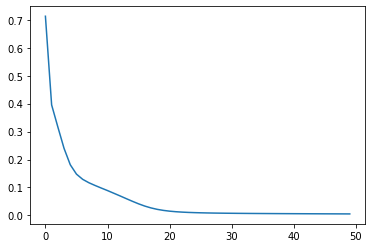

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])